# Visualization of Titanic Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("titanic.csv", sep = ",")
test_df = pd.read_csv("test.csv", sep = ",")
full_df = pd.concat([df, test_df])

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualization of Gender

In [4]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

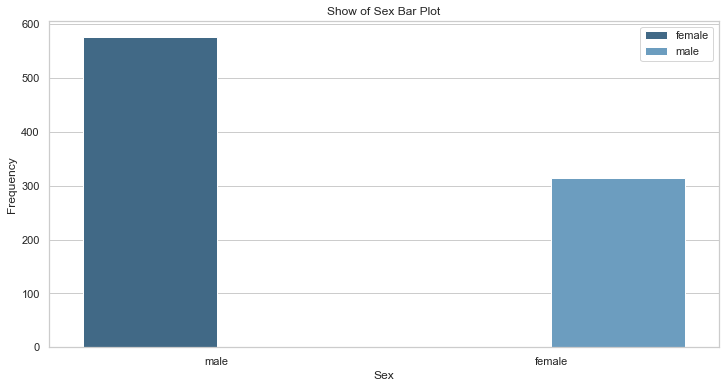

In [5]:
# Cinsiyet Değişkeni için bar plot:
plt.figure(figsize = (12,6))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = df['Sex'].value_counts().index, y = df['Sex'].value_counts().values,
                palette = 'Blues_d', hue = ['female','male'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Show of Sex Bar Plot')
plt.show()

# Visualization of Title

In [6]:
for dataset in [df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:
# Veri setinde yer alan name değişkeninde bulanan unvanları daha genel kullanımına 
# göre replace metoduyla değiştirelim ve hayatta kalma durumuna göre gruplayalım

for dataset in [df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


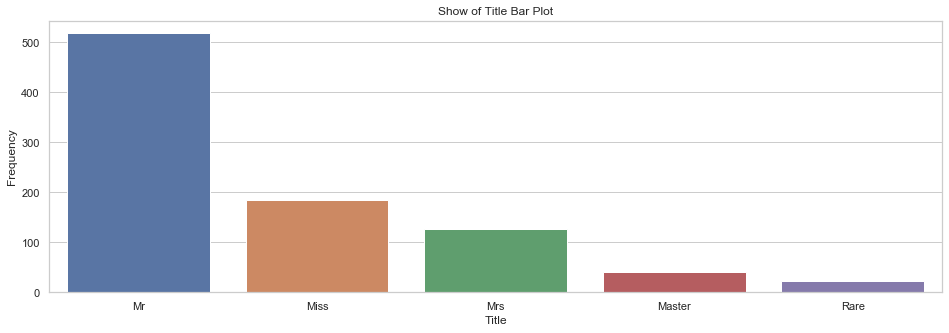

In [8]:

plt.figure(figsize=(16,5))
sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values)
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.title('Show of Title Bar Plot')
plt.show()

# Visualization of Age vs Survived-Not Survived Distribution using kdeplot

Text(0, 0.5, 'Frequency')

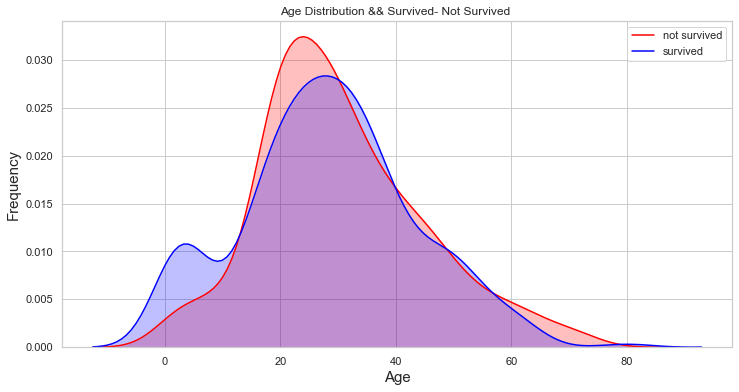

In [9]:
fig = plt.figure(figsize = (12,6))
ax = sns.kdeplot(df.loc[(df['Survived'] == 0), 'Age'], color = 'red', shade = True, label = 'not survived')
ax = sns.kdeplot(df.loc[(df['Survived'] == 1), 'Age'], color = 'blue', shade = True, label = 'survived')
plt.title('Age Distribution && Survived- Not Survived ')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# Visualization of Pclass- Age-Sex using barplot

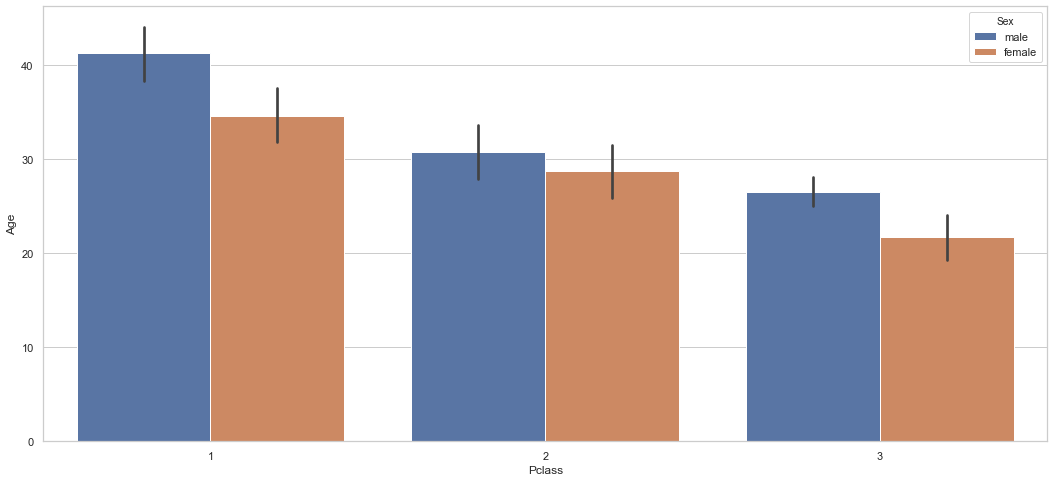

In [10]:
# 3 değişkeni aynı grafik üzerinde gösterme

plt.figure(figsize = (18,8))
sns.barplot(x ='Pclass', y = 'Age', hue = 'Sex', data = df)
plt.show()


# Visualization of Subplots using violinplot

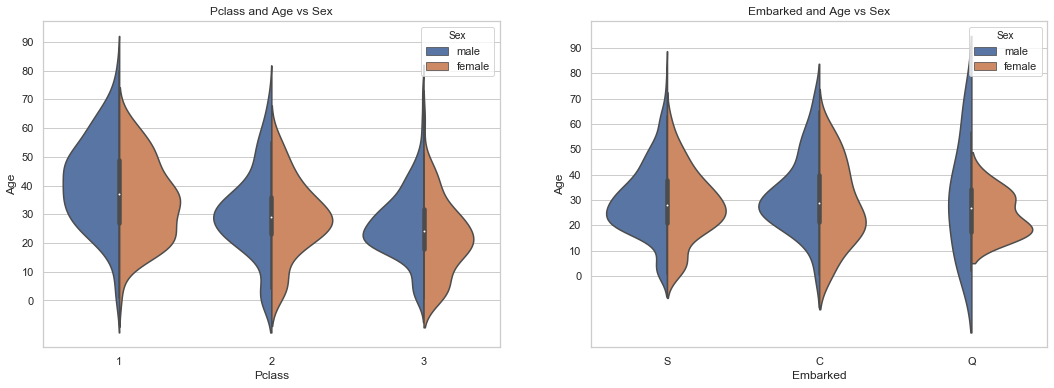

In [11]:
f, ax = plt.subplots(1,2, figsize = (18,6))

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Sex', split = True, data = df, ax = ax[0])
ax[0].set_title('Pclass and Age vs Sex')
ax[0].set_yticks(range(0,100,10))

sns.violinplot(x = 'Embarked', y = 'Age', hue = 'Sex',split = True, data = df,  ax = ax[1])
ax[1].set_title('Embarked and Age vs Sex')
ax[1].set_yticks(range(0,100,10))

plt.show()

# Visualization of Subplots using Distplot

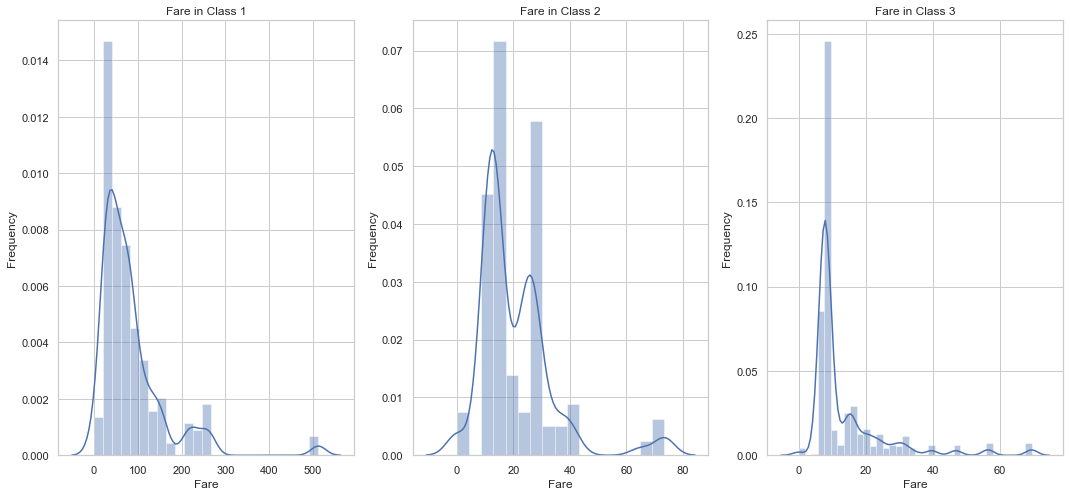

In [12]:
# Fare for each Pclass

f,ax = plt.subplots(1,3, figsize = (18,8))

sns.distplot(df[df['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_ylabel('Frequency')
ax[0].set_title('Fare in Class 1')

sns.distplot(df[df['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_ylabel('Frequency')
ax[1].set_title('Fare in Class 2')

sns.distplot(df[df['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_ylabel('Frequency')
ax[2].set_title('Fare in Class 3')

plt.show()

# Visualization of Embarked-Age-Sex using swarmplot

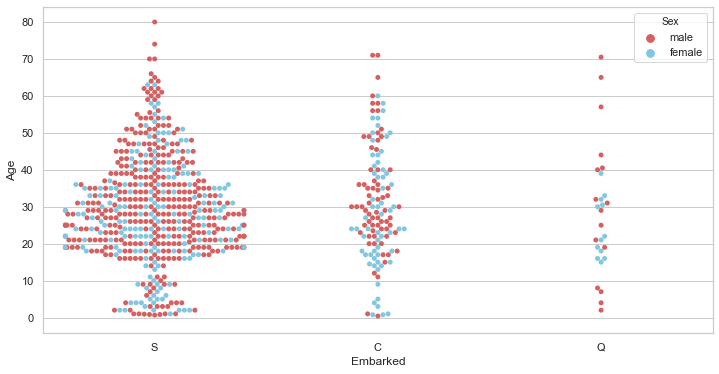

In [13]:
plt.figure(figsize = (12,6))
sns.set(style = 'whitegrid', palette = 'muted')
sns.swarmplot(x = 'Embarked', y = 'Age', hue = 'Sex',palette = ['r','c','y'], data = df)
plt.show()

# Visualization of Surval Status for each Embarked using factorplot

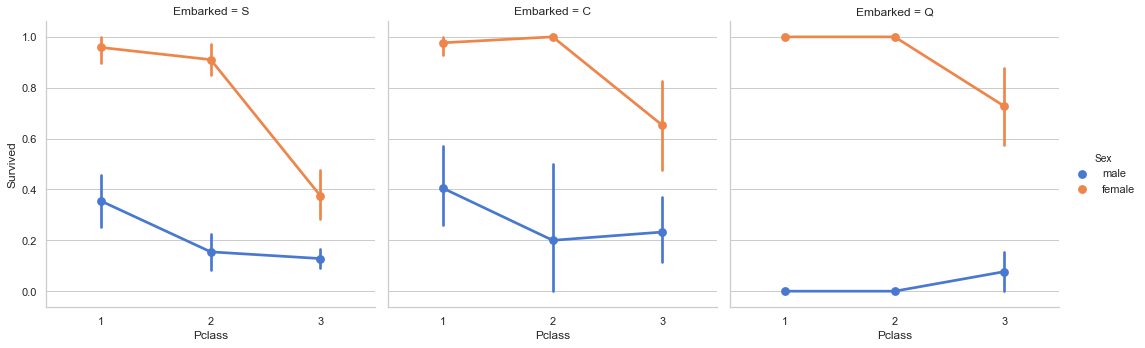

In [14]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = df)
plt.show()

# Visualization of Embarked vs Survived using Countplot and Pointplot

Text(0.5, 1.0, 'Percentage Survived by Embarked')

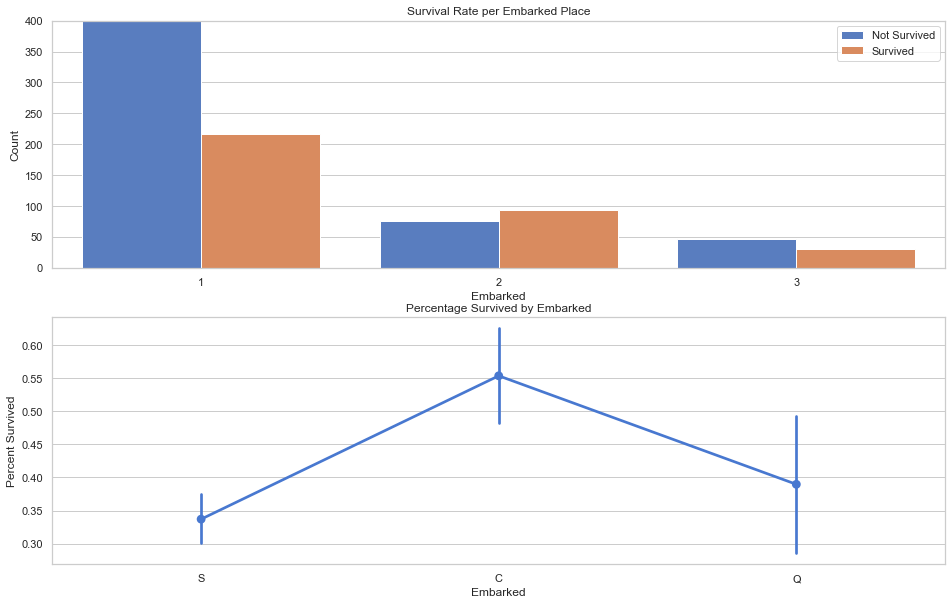

In [15]:
fig = plt.figure(figsize = (16,10))

ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Embarked', hue = 'Survived', data = df)
ax1.set_title('Survival Rate per Embarked Place')
ax1.set_xticklabels(['1','2','3'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Embarked')
ax1.set_ylabel('Count')
ax1.legend(['Not Survived', 'Survived'])



ax2 = plt.subplot(2,1,2)
sns.pointplot(x = 'Embarked', y = 'Survived', data = df)
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Embarked')

# Visualization of Implot based on Age and Survived

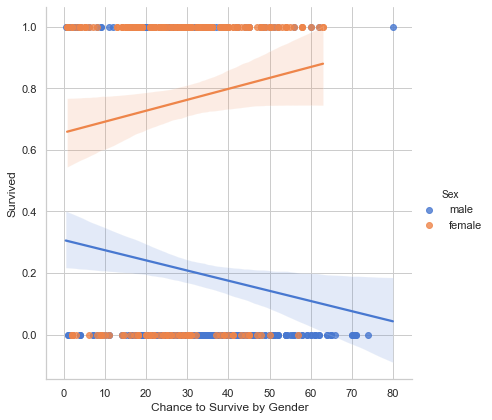

In [23]:
g = sns.lmplot("Age","Survived",hue = "Sex", data = df, height = 6)

g = (g.set_axis_labels("Chance to Survive by Gender"))

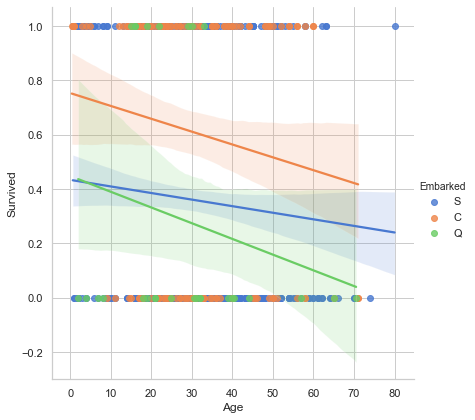

In [24]:
sns.lmplot('Age','Survived',data=df,hue='Embarked', height = 6)


# Visualization of Pclass by Survived using crosstab

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


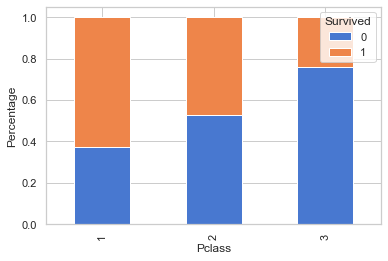

In [25]:
tab = pd.crosstab(df['Pclass'], df['Survived'])
print(tab)
p = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
p = plt.xlabel('Pclass')
p = plt.ylabel('Percentage')

# Visualization of Correlation Matrix Using Heatmap

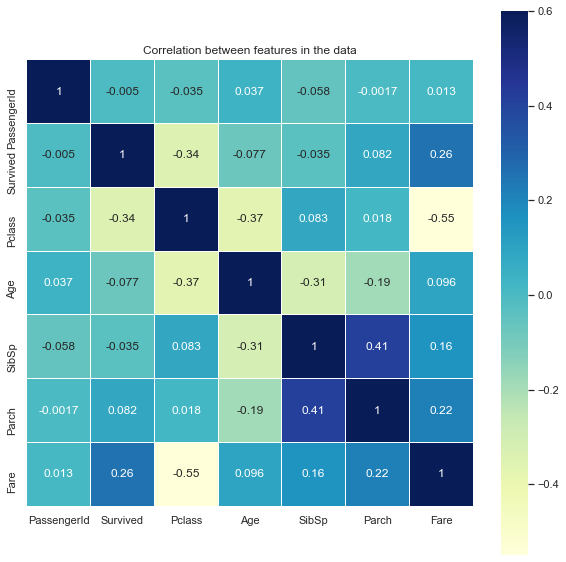

In [27]:
corr=df.corr() # building corr matrix 
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.6, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features in the data');